<h1 style="text-align: center;">SALES ANALYSIS</h1>

## PROBLEM STATEMENT :
To perform a detailed analysis of a dataset containing sales information and order quantities, we would typically follow a series of steps in the data analysis process. Below is a structured approach to performing the analysis, which includes data cleaning, exploratory data analysis (EDA), and generating insights based on the data.

### Objectives:

**Importing necessary Libraries/Modules**:
- Import the modules necessary for Data Manipulation and Visualization.

**Loading dataset**:
- Read the dataset containing sales information.

**Task 1 - Exploring the Dataset**:
- Understand the Structure and various datatypes of the attributes within the dataset.

**Task 2 - Missing value analysis**:
- Identify and analyze missing values in the dataset.`

**Task 3 - Adding data with additional columns**  
- Adding New Column Based on Existing Data

**Task 4 - Bi-varidate analysis**  
- Conduct bivariate analysis to explore relationships between different variables and answer the following questions

**CONCLUSION**

### IMPORTING LIBRARIES/MODULES

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### LOADING THE DATASET

In [2]:
# Get the list of all CSV files in the directory
files=[file for file in os.listdir("./DirtySalesDate")if file.endswith(".csv")]

In [3]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

**We have 12 CSV files, one for each month of the year 2019. Let's combine them into a single CSV file for easier analysis.**

In [4]:
# Create an empty Dataframe to hold the combined data
df=pd.DataFrame()

# Read and concatenate each CSV file
for i in files:
    month_data=pd.read_csv("./DirtySalesDate"+"//"+i)
    df=pd.concat([df,month_data])

## **Task 1 - Exploring the Dataset**:

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## **Task 2 - Missing value analysis**:

In [8]:
#  let's check the the count of NaN values for each column.
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# filter rows in df where any of the values are NaN 
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# dropping the rows where every column is NaN 
df = df.dropna(how='all')

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### **Let's correct the data types of each column**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
 # Filter out rows where 'Quantity Ordered' column contains 'Quantity Ordered'
df=df[df["Quantity Ordered"]!="Quantity Ordered"]

In [14]:
# changing the data type of "Quantity Ordered" to int
df["Quantity Ordered"]=df["Quantity Ordered"].astype(int)

In [15]:
# converting "Order Date" column into a datetime format.
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [16]:
# changing the data type of "Price Each" to numeric
df['Price Each'] = df['Price Each'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


## **Task 3 - Adding data with additional columns** 

####  Adding a "Month" column to identify the best month for sales

In [18]:
df["Month"]=df["Order Date"].dt.month 

#### Adding a "Sales" column 

In [19]:
df["Sales"]=df["Quantity Ordered"]*df["Price Each"]

#### Adding a "City" column 

In [20]:
def city(address):
    return address.split(",")[1]
def state(address):
    return address.split(",")[2].split(" ")[1]

df["City"]=df["Purchase Address"].apply(lambda x : f"{city(x)} ({state(x)})")

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Sorting the data according to the order date

In [22]:
# sorting the data according to the order date
df.sort_values(by="Order Date",inplace=True)

In [23]:
# reseting the index 
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


# Task 4 - Bi-varidate analysis

### Question 1: what was the best month for sales ? How much was earned that month

In [25]:
month_sale=df.groupby(["Month"])["Sales"].sum()

In [26]:
month_sale

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

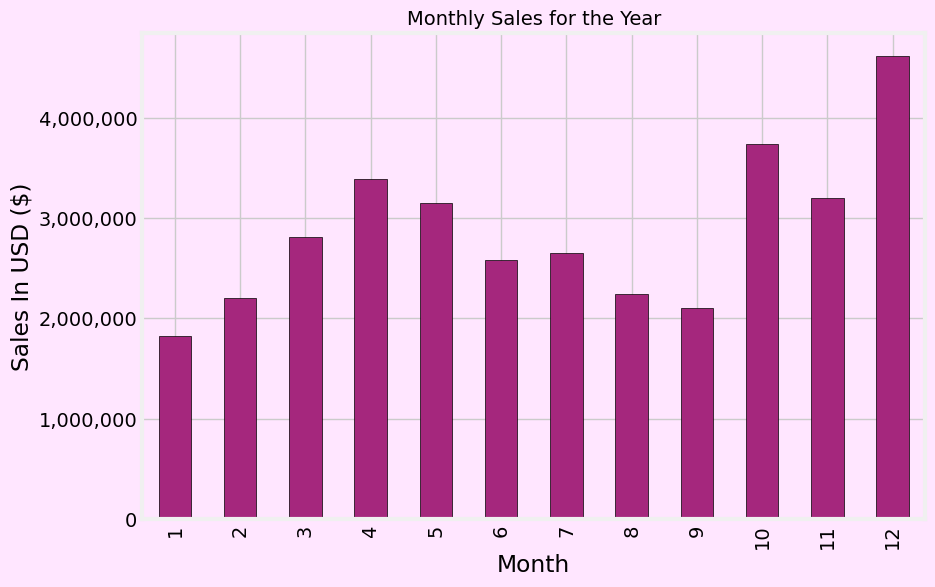

In [27]:
# set the style to fivethirtyeight
plt.style.use("fivethirtyeight")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(9,6))

# Set the background color
fig.patch.set_facecolor("#ffe6ff")  # Figure background
ax.set_facecolor('#ffe6ff')  #plot area background 

month_sale.plot(kind="bar",color="#a5277d",edgecolor="black")

# x label
plt.xlabel("Month")

# ylabel
plt.ylabel("Sales In USD ($)")

# title of the graph
plt.title("Monthly Sales for the Year", fontsize=14)

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# show the graph
plt.show()

<div style="background-color:#ffe6ff; padding:1px;"> The best month for sales is December (Month 12), with a total of $4,613,443.34 in sales.**
December (Month 12) has the highest sales at 4,613,443.34 dollars, nearly doubling the sales of January, which had the lowest sales at 1,822,256.73 dollars. This suggests that sales tend to increase toward the end of the year, likely due to seasonal factors such as the holiday shopping season.<div>


In [28]:
# sales in different citites in all the 12 month 

In [29]:
df.pivot_table(
    values="Sales",             # Column to aggregate
    index="City",               # Rows (index)
    columns="Month",            # Columns
    aggfunc="sum",              # Aggregation function (e.g., sum, mean, etc.)
    fill_value=0                # Optional: Fill missing values with 0 (or any value you prefer)
)


Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
Atlanta (GA),149159.54,176470.30,231905.38,284448.91,238853.99,219816.47,211766.47,169267.66,171278.89,306293.01,275338.70,360899.26
Austin (TX),88087.06,108787.40,154549.27,172683.59,160635.22,144057.29,150324.93,125713.61,106483.70,203196.12,171286.47,233777.09
Boston (MA),201088.49,214808.36,301023.81,353807.11,328803.65,254747.89,291497.14,239275.26,248408.73,367036.39,351546.02,509599.16
Dallas (TX),143462.51,186667.99,222376.68,251360.48,268456.49,186885.75,212325.17,179763.46,164212.86,323135.60,248609.56,380718.85
Los Angeles (CA),288601.90,342061.66,429929.37,550264.02,499689.21,451531.93,394334.64,345893.50,354075.69,612453.25,499690.79,684044.84
New York City (NY),260591.29,305372.26,367262.20,449447.75,436126.40,324148.58,355716.10,303183.46,300563.83,486954.41,428180.32,646770.83
Portland (ME),22708.80,29845.49,30516.29,42536.49,57978.76,30025.33,32421.14,35996.60,28759.56,52322.52,34681.22,51966.07
Portland (OR),92276.76,119606.37,156691.72,197441.63,173729.25,139562.02,143994.49,116881.14,103811.88,201778.34,173210.70,251748.04
San Francisco (CA),435588.33,547072.34,693726.96,812426.19,776679.49,613173.48,642881.76,538778.10,463595.72,866700.98,764979.29,1106601.27


### Question 2: what city has the highest number of sales?

In [30]:
result=df.groupby(["City"])["Sales"].sum()
result

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

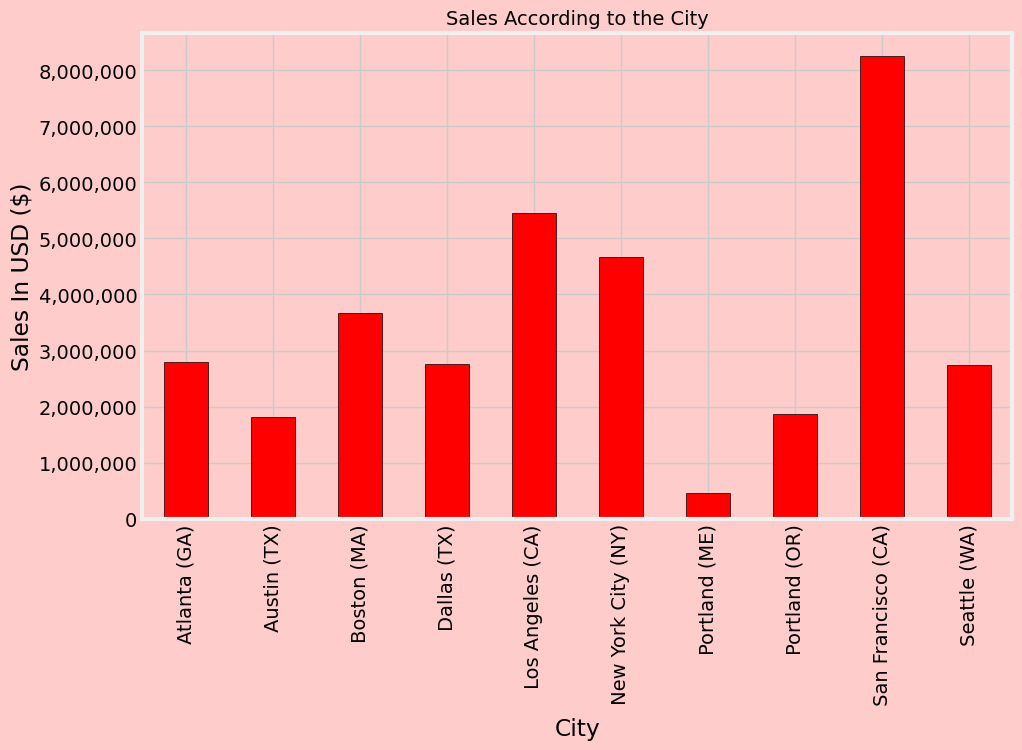

In [31]:
# Apply fivethirtyeight style
plt.style.use("fivethirtyeight")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Set the background colors
fig.patch.set_facecolor('#ffcccc')  # Set figure background color
ax.set_facecolor('#ffcccc')            # Set plot area background color

# Plot the data as a bar chart
result.plot(kind="bar", ax=ax, color='#ff0000', edgecolor='black')

# Customize labels and title
plt.ylabel("Sales In USD ($)")
plt.xlabel("City")
plt.title("Sales According to the City", fontsize=14)

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the plot
plt.show()

<div style="background-color:#ffcccc
; padding:10px;"> San Francisco (CA) leads the cities in total sales revenue, with over 8.26 million dollars,
while Portland (ME) shows the lowest sales at just under 450K, highlighting significant regional difference
     in sales performance.<div>

In [32]:
df.pivot_table(
    values="Sales",             # Column to aggregate
    index="Product",               # Rows (index)
    columns="City",            # Columns
    aggfunc="sum",              # Aggregation function (e.g., sum, mean, etc.) 
)


City,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,37616.58,25297.70,43336.06,37726.57,72373.42,61594.40,6489.41,24087.81,109990.00,35636.76
27in 4K Gaming Monitor,192265.07,124016.82,263243.25,187585.19,391159.97,328371.58,33149.15,136106.51,569385.40,209814.62
27in FHD Monitor,88194.12,53996.40,119542.03,88044.13,183437.77,160789.28,17098.86,62395.84,272081.86,86844.21
34in Ultrawide Monitor,183155.18,124636.72,254973.29,194554.88,362890.45,329831.32,28879.24,124256.73,549465.54,202914.66
AA Batteries (4-pack),8421.12,5468.16,11581.44,8682.24,17041.92,13939.20,1493.76,5952.00,25171.20,8367.36
AAA Batteries (4-pack),7053.41,4987.32,10348.39,7486.96,14851.33,12330.76,1070.42,5148.78,22149.92,7313.54
Apple Airpods Headphones,189900.00,133050.00,247950.00,179100.00,370950.00,314700.00,34950.00,129900.00,559950.00,188700.00
Bose SoundSport Headphones,108389.16,70692.93,141585.84,106289.37,212478.75,179382.06,17998.20,70892.91,331666.83,106189.38
Flatscreen TV,122100.00,72600.00,166200.00,126000.00,218100.00,188400.00,18600.00,75000.00,346200.00,112500.00


### Question 3 :What products are most sold together?

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


In [34]:
sold_together=df[df["Order ID"].duplicated(keep=False)]

In [35]:
sold_together.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
11,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City (NY)
12,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta (GA)
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta (GA)
79,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,700.00,Dallas (TX)
80,148450,Lightning Charging Cable,1,14.95,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,14.95,Dallas (TX)
92,144679,USB-C Charging Cable,1,11.95,2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
93,144679,Google Phone,1,600.00,2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016",1,600.00,San Francisco (CA)
94,147451,Wired Headphones,1,11.99,2019-01-01 12:57:00,"229 Elm St, New York City, NY 10001",1,11.99,New York City (NY)
95,147451,Google Phone,1,600.00,2019-01-01 12:57:00,"229 Elm St, New York City, NY 10001",1,600.00,New York City (NY)


In [36]:
sold_together["grouped"]=sold_together.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
sold_together=sold_together[["Order ID","grouped"]].drop_duplicates()

In [37]:
sold_together.reset_index(drop=True,inplace=True)

In [38]:
sold_together

,Order ID,grouped
0,144804,"iPhone,Wired Headphones"
1,148074,"USB-C Charging Cable,Google Phone"
2,148450,"iPhone,Lightning Charging Cable"
3,144679,"USB-C Charging Cable,Google Phone"
4,147451,"Wired Headphones,Google Phone"
...,...,...
7131,301832,"20in Monitor,AAA Batteries (4-pack)"
7132,311036,"Macbook Pro Laptop,AAA Batteries (4-pack)"
7133,311386,"Apple Airpods Headphones,iPhone"
7134,297817,"iPhone,Lightning Charging Cable"


In [39]:
sold_together["grouped"].value_counts()

grouped
Lightning Charging Cable,iPhone                               458
USB-C Charging Cable,Google Phone                             453
iPhone,Lightning Charging Cable                               433
Google Phone,USB-C Charging Cable                             415
Wired Headphones,iPhone                                       191
                                                             ... 
iPhone,Lightning Charging Cable,34in Ultrawide Monitor          1
iPhone,Bose SoundSport Headphones,Apple Airpods Headphones      1
LG Washing Machine,iPhone                                       1
Vareebadd Phone,27in 4K Gaming Monitor                          1
Google Phone,34in Ultrawide Monitor                             1
Name: count, Length: 418, dtype: int64

**Using the Counter function from the collections module to create a dictionary where the key represents pairs of products sold together, and the value indicates the number of times those products were sold together.**

In [40]:
from collections import Counter

dict=Counter(sold_together["grouped"])

In [41]:
dict

Counter({'Lightning Charging Cable,iPhone': 458,
         'USB-C Charging Cable,Google Phone': 453,
         'iPhone,Lightning Charging Cable': 433,
         'Google Phone,USB-C Charging Cable': 415,
         'Wired Headphones,iPhone': 191,
         'iPhone,Wired Headphones': 183,
         'Vareebadd Phone,USB-C Charging Cable': 162,
         'USB-C Charging Cable,Vareebadd Phone': 156,
         'Google Phone,Wired Headphones': 156,
         'Wired Headphones,Google Phone': 155,
         'iPhone,Apple Airpods Headphones': 152,
         'Apple Airpods Headphones,iPhone': 147,
         'Google Phone,Bose SoundSport Headphones': 99,
         'Bose SoundSport Headphones,Google Phone': 70,
         'Vareebadd Phone,Wired Headphones': 59,
         'AA Batteries (4-pack),Lightning Charging Cable': 59,
         'AAA Batteries (4-pack),Wired Headphones': 52,
         'Lightning Charging Cable,Lightning Charging Cable': 51,
         'Wired Headphones,Vareebadd Phone': 51,
         'USB-C Chargin

### Question 4: What product sold the most and why do you think it sold the most ?

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


In [43]:
quantity_sold=df.groupby(["Product"])["Quantity Ordered"].sum()

In [44]:
quantity_sold.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

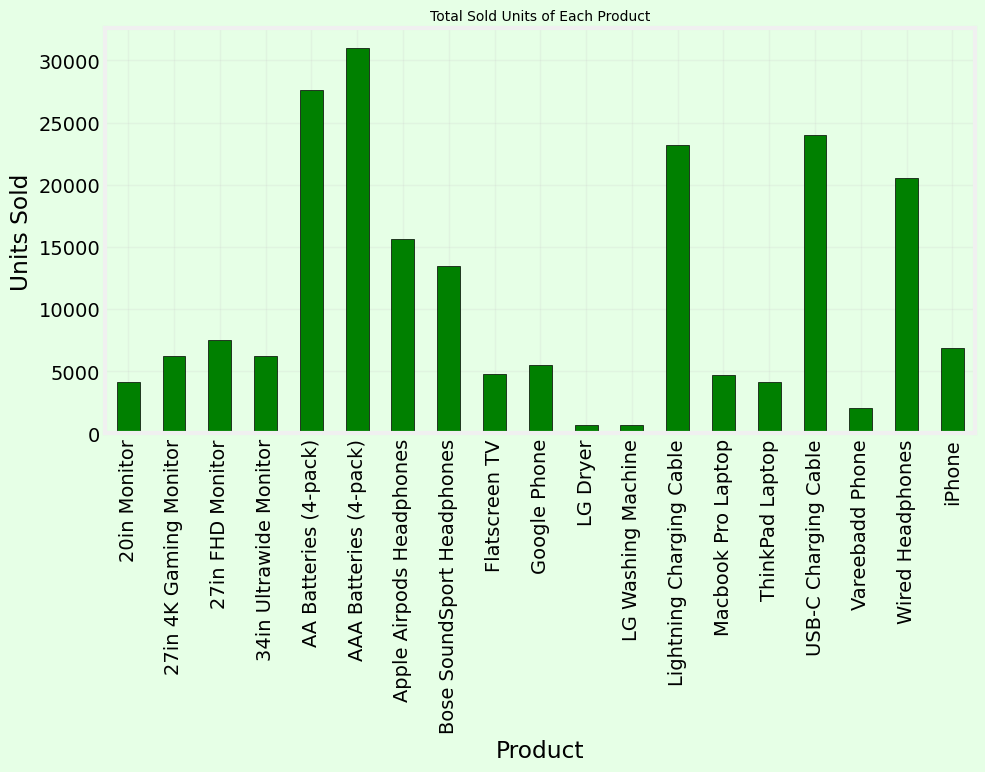

In [45]:
# Apply fivethirtyeight style
plt.style.use("fivethirtyeight")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set the background colors
fig.patch.set_facecolor('#e6ffe6')  # Set figure background color
ax.set_facecolor('#e6ffe6')            # Set plot area (axes) background color

# Plot the data as a bar chart
quantity_sold.plot(kind="bar", ax=ax, color="#008000", edgecolor='black')

# Add title and labels
plt.title("Total Sold Units of Each Product", fontsize=10)
plt.ylabel("Units Sold")
plt.xlabel("Product")

# Add a grid with lower alpha for transparency
plt.grid(alpha=0.2)

# Show the plot
plt.show()

<div style="background-color:#e6ffe6; padding:10px;">
The best-selling product is the AAA Batteries (4-pack), with a total of 31,017 units sold, followed by the AA Batteries (4-pack) with a total of 27,635 units sold. The high sales of AAA batteries can likely be attributed to their widespread use in small electronic devices such as remote controls, flashlights, toys, clocks, and more.**</div>

### Question 5:What time should we display the advertisements to maximize likelihood of customer's buying?

In [46]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


In [47]:
df['Hours']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY),3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA),3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY),4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX),5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA),6


In [48]:
by_hours=df.groupby('Hours')['Sales'].sum()
gp_by_hours = by_hours.reset_index()
gp_by_hours.columns = ['Hours','Total sales']
# gp_by_hours

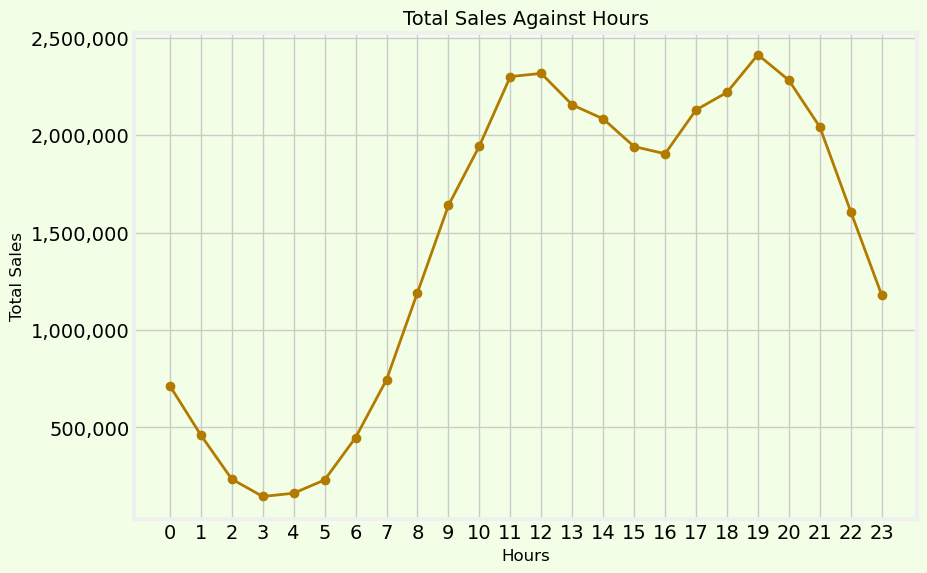

In [49]:
# Set the style to fivethirtyeight
plt.style.use("fivethirtyeight")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(9, 6))

# Set the background color
fig.patch.set_facecolor("#f2ffe6")  # Figure background
ax.set_facecolor('#f2ffe6')  # Plot area background

# Plotting the data
ax.plot(gp_by_hours['Hours'], gp_by_hours['Total sales'], color="#b37a00", marker="o", linestyle="-", linewidth=2, markersize=6)

# Set x and y labels
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Set title
plt.title("Total Sales Against Hours", fontsize=14)

# Customize the x-axis ticks
ax.xaxis.set_major_locator(MultipleLocator(1))  # Set ticks every 1 hour
ax.set_xticks(gp_by_hours['Hours'])  # Align ticks with data points

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the graph
plt.show()

<div style="background-color:#f2ffe6; padding:10px;">The graph shows:

Low sales during early morning (2-5 AM) and late night (after 9 PM).
Peak sales in the mid-morning (10-11 AM) and evening (5-8 PM).
Midday stability with a slight dip post-lunch (2-3 PM).
Optimize resources during peak hours and reduce costs during low-activity periods.<div>

###  Let us store this cleaned data into a new excel file naming "Sales_analysis.xlsx"

In [50]:
df.to_excel("Sales_analysis_Dashboard.xlsx",index=False)

##### Read the file above file 

In [51]:
df=pd.read_excel("Sales_analysis_Dashboard.xlsx")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY),3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA),3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY),4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX),5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA),6


### Let us compare the Price and sales of each product

In [52]:
# Group the data by 'Product' and 'Price Each' to calculate the total quantity ordered for each combination.
# This provides insight into how the quantity sold varies with product and price.
price_sale=df.groupby(["Product","Price Each"])["Quantity Ordered"].sum()

In [53]:
price_sale_df=pd.DataFrame(price_sale)

In [54]:
price_sale_df.reset_index(inplace=True)

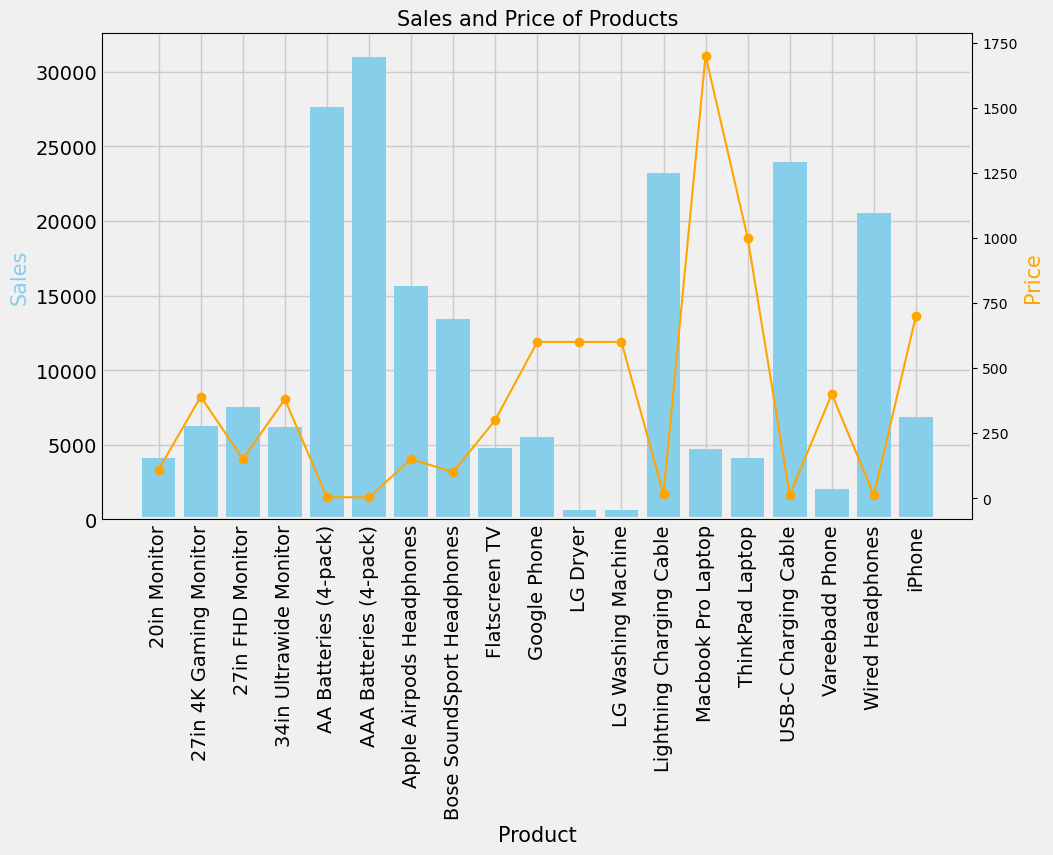

In [55]:
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.style.use("default")
# Bar plot for Sales
ax1.bar(price_sale_df['Product'], price_sale_df['Quantity Ordered'], color='skyblue', label='Sales')
ax2 = ax1.twinx()
# line plot for Price
ax2.plot(price_sale_df['Product'], price_sale_df['Price Each'], color='orange', marker='o', label='Price')


ax1.set_xlabel('Product',fontsize=15)
ax1.set_ylabel('Sales', color='skyblue',fontsize=15)
ax1.tick_params(axis="y",color="skyblue")
ax2.set_ylabel('Price', color='orange',fontsize=15)
# ax1.set_xticklabels(rotation="vertical")
ax1.set_xticklabels(price_sale_df['Product'], rotation=90)

# Title and show plot
plt.title('Sales and Price of Products',fontsize=15)
plt.show()

<div style="background-color:lightblue; padding:1px;">Products like USB-C Charging Cable and AAA Batteries are low in price but show decent sales, making them affordable and accessible.MacBook Pro Laptop has a high price but moderate sales.Bose SoundSport Headphones and Apple AirPods Headphones have a balanced combination of moderate pricing and high sales, suggesting good value and popularity.
FlatScreen TV has moderate sales but a noticeable price.<div>

# CONCLUSION

This analysis highlights key trends in sales performance, regional differences, and product popularity. 
- December was the best month for sales, nearly doubling January's figures, suggesting a strong seasonal boost driven by holiday shopping.
- Regionally, San Francisco led with over 8.26 million dollars in sales, while Portland (ME) showed the lowest sales at under 450K, indicating significant regional variations.
- In terms of products, the AAA Batteries (4-pack) were the best-sellers, with 31,017 units sold, reflecting strong demand for affordable, everyday items.
- Other popular products like the AA Batteries and USB-C Charging Cables also performed well, while higher-ticket items such as the MacBook Pro and Apple AirPods showed solid sales at higher price points.
- Low sales during early morning (2-5 AM) and late night (after 9 PM). Peak sales in the mid-morning (10-11 AM) and evening (5-8 PM). Midday stability with a slight dip post-lunch (2-3 PM). Optimize resources during peak hours and reduce costs during low-activity periods.

Overall, this data underscores the importance of seasonal trends, regional markets, and consumer preferences in shaping sales strategies. Products with low price points and high utility, like batteries, drive volume sales, while premium items cater to customers seeking value in quality and performance.

#